<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-cnn/blob/main/geometric_augmented_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless==4.8.0.74
!pip install numpy==1.25.2

Reason for being yanked: deprecated, use 4.8.0.76
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.84
    Uninstalling opencv-python-headless-4.10.0.84:
      Successfully uninstalled opencv-python-headless-4.10.0.84
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
albumentations 1.4.20 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.8.0.74 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uni

In [1]:
import cv2
import numpy as np
from google.colab import files

In [7]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving Frame 274_tooth_0.jpg to Frame 274_tooth_0.jpg


In [8]:
img = cv2.imread(image_path)

In [9]:
def rotate(img, angle):
  rows, cols = img.shape[:2]
  M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
  return cv2.warpAffine(img, M, (cols, rows))

def translate(img, x, y):
  rows, cols = img.shape[:2]
  M = np.float32([[1, 0, x], [0, 1, y]])
  return cv2.warpAffine(img, M, (cols, rows))

def shear(img, x, y):
  rows, cols = img.shape[:2]
  M = np.float32([[1, x, 0], [y, 1, 0]])
  return cv2.warpAffine(img, M, (cols, rows))

def flip(img, direction):
  return cv2.flip(img, direction)

def scale(img, factor):
  return cv2.resize(img, None, fx=factor, fy=factor)

In [10]:
rotated_img = rotate(img, 45)  # Rotate by 45 degrees
translated_img = translate(img, 50, 25)  # Translate by (50, 25) pixels
sheared_img = shear(img, 0.2, 0)  # Shear along x-axis by 0.2
flipped_img = flip(img, 1)  # Flip horizontally (1) or vertically (0)
scaled_img = scale(img, 1.5)  # Scale by a factor of 1.5

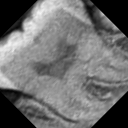

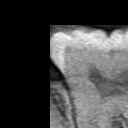

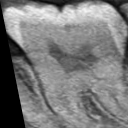

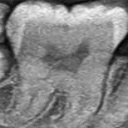

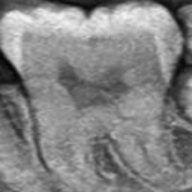

In [11]:
# Import necessary library for displaying images if you want to view them.
from google.colab.patches import cv2_imshow

cv2_imshow(rotated_img)
cv2_imshow(translated_img)
cv2_imshow(sheared_img)
cv2_imshow(flipped_img)
cv2_imshow(scaled_img)